In [1]:
import glob
import itertools

import numpy             as np
import tables            as tb
import pandas            as pd
import matplotlib.pyplot as plt

from invisible_cities.database.load_db                 import DataSiPM
from invisible_cities.sierpe  .blr                     import deconv_pmt
from invisible_cities.reco    .peak_functions          import rebin_times_and_waveforms
from invisible_cities.reco    .calib_sensors_functions import calibrate_wfs
from invisible_cities.reco    .calib_sensors_functions import calibrate_sipms
from invisible_cities.icaro   .hst_functions           import labels
from invisible_cities.database.load_db                 import DataPMT
from invisible_cities.database.load_db                 import DataSiPM

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"   ] = 12, 8
plt.rcParams[  "font.size"      ] = 40
plt.rcParams["figure.autolayout"] = True

In [3]:
legend_opts = dict(fontsize=18, ncol=2)

/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


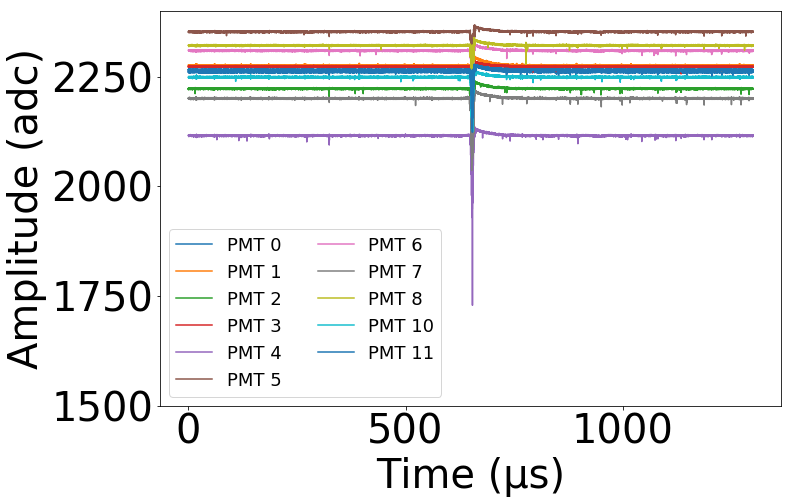

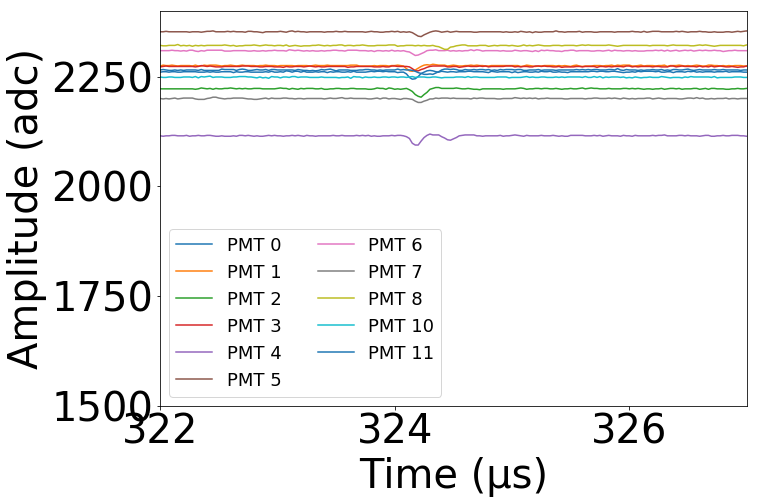

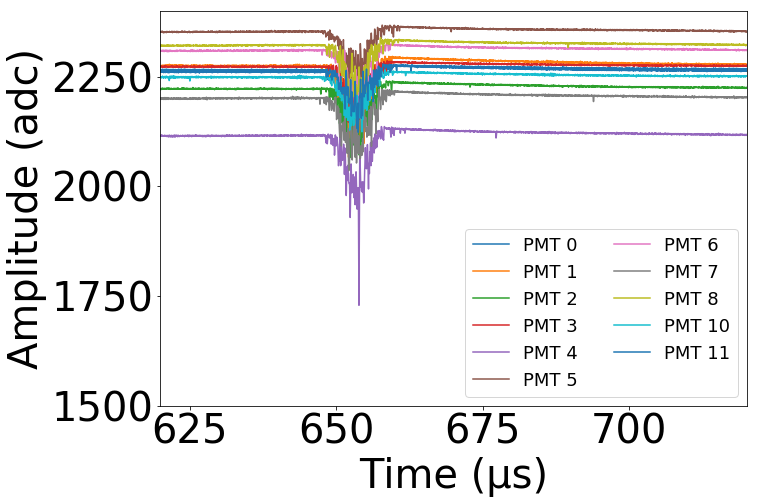

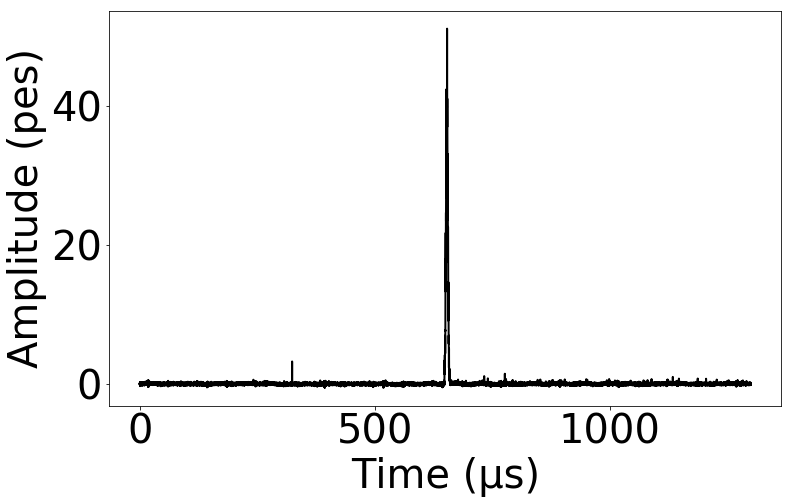

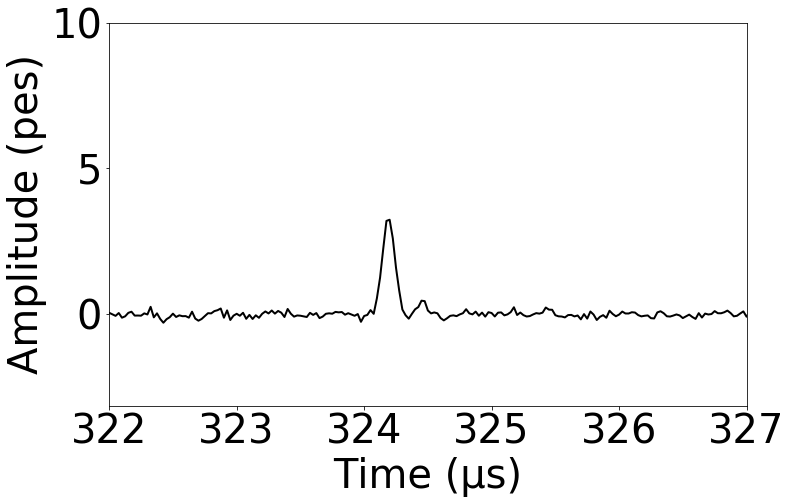

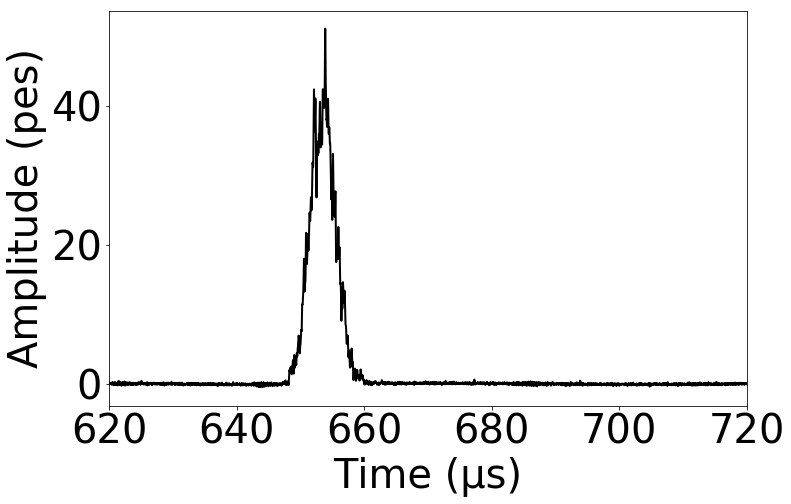

In [4]:
run_number = 4786
datapmt    = DataPMT (run_number)
datasipm   = DataSiPM(run_number)
#input_filename = f"/Users/Gonzalo/github/NEXTdata/Kr/4446/rwf/dst_waves.gdcsnext.000_{run_number}.root.h5"
input_filename = f"/Users/Gonzalo/github/NEXTdata/Kr/dst_waves.gdcsnext.000_{run_number}.root.h5"
n = 0
with tb.open_file(input_filename) as file:
    for wfs in file.root.RD.pmtrwf:
        n += 1
        if n < 13: continue
        cwfs   = deconv_pmt(wfs,
                            coeff_c    = datapmt.coeff_c.values,
                            coeff_blr  = datapmt.coeff_blr.values,
                            n_baseline = 48000)
        ccwfs  = calibrate_wfs(cwfs, datapmt.adc_to_pes.values)
        sum_wf = np.sum(ccwfs, axis=0)
        time   = np.arange(wfs.shape[-1]) / 40

        plt.figure()
        for i, (id, active, wf) in enumerate(zip(datapmt.SensorID.values,
                                                 datapmt.Active  .values,
                                                 wfs)):
            if not active: continue
            plt.plot(time, wf, label=f"PMT {id}")

        labels("Time (µs)", "Amplitude (adc)")
        plt.ylim(1500, 2400)
        plt.legend(**legend_opts)
        plt.savefig("/Users/Gonzalo/Desktop/kr_pmt_wfs.png")

        plt.figure()
        for i, (id, active, wf) in enumerate(zip(datapmt.SensorID.values,
                                                 datapmt.Active  .values,
                                                 wfs)):
            if not active: continue
            plt.plot(time, wf, label=f"PMT {id}")

        labels("Time (µs)", "Amplitude (adc)")
        plt.xlim( 322,  327)
#        plt.ylim(2050, 2400)
        plt.ylim(1500, 2400)
        plt.legend(**legend_opts)
        plt.savefig("/Users/Gonzalo/Desktop/kr_pmt_wfs_zoom_s1.png")

        plt.figure()
        for i, (id, active, wf) in enumerate(zip(datapmt.SensorID.values,
                                                 datapmt.Active  .values,
                                                 wfs)):
            if not active: continue
            plt.plot(time, wf, label=f"PMT {id}")

        labels("Time (µs)", "Amplitude (adc)")
        plt.xlim( 620,  720)
        plt.ylim(1500, 2400)
        plt.legend(**legend_opts)
        plt.savefig("/Users/Gonzalo/Desktop/kr_pmt_wfs_zoom_s2.png")

        plt.figure()
        plt.plot(time, sum_wf, c="k", linewidth=2)
        labels("Time (µs)", "Amplitude (pes)")
        plt.savefig("/Users/Gonzalo/Desktop/kr_sum_wf.png")
        
        plt.figure()
        plt.plot(time, sum_wf, c="k", linewidth=2)
        plt.xlim(322, 327)
        plt.ylim(plt.ylim()[0],  10)
        labels("Time (µs)", "Amplitude (pes)")
        plt.savefig("/Users/Gonzalo/Desktop/kr_sum_wf_zoom_s1.png")

        plt.figure()
        plt.plot(time, sum_wf, c="k", linewidth=2)
        plt.xlim(620, 720)
        labels("Time (µs)", "Amplitude (pes)")
        plt.savefig("/Users/Gonzalo/Desktop/kr_sum_wf_zoom_s2.png")
        
        plt.show()
        break

/Applications/anaconda3/envs/IC3.6/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


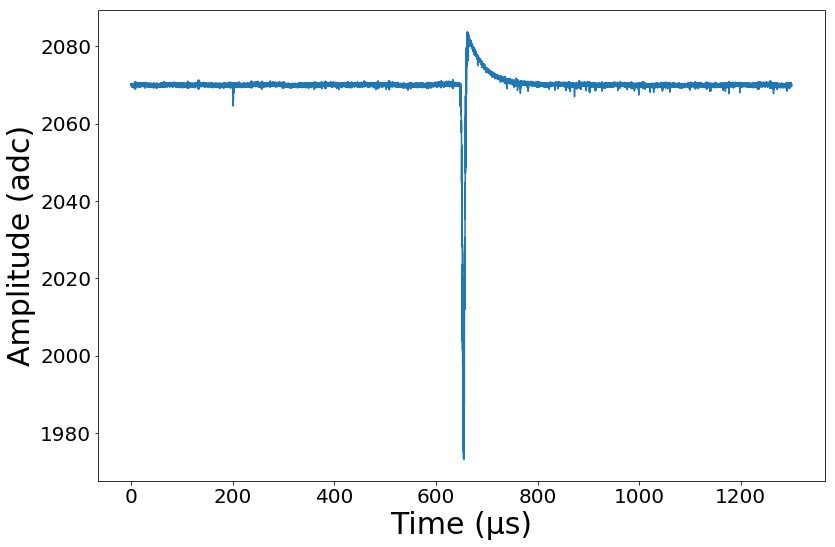

In [16]:
run_number = 4786
datapmt    = DataPMT (run_number)
datasipm   = DataSiPM(run_number)
#input_filename = f"/Users/Gonzalo/github/NEXTdata/Kr/4446/rwf/dst_waves.gdcsnext.000_{run_number}.root.h5"
input_filename = f"/Users/Gonzalo/github/NEXTdata/Kr/dst_waves.gdcsnext.000_{run_number}.root.h5"
n = 0

plt.rcParams["figure.figsize"   ] = 12, 8
plt.rcParams[  "font.size"      ] = 20
plt.rcParams["figure.autolayout"] = True

with tb.open_file(input_filename) as file:
    for wfs in file.root.RD.pmtrwf:
        n += 1
        if n < 2: continue
        sum_wf = np.mean(wfs, axis=0)
        time   = np.arange(wfs.shape[-1]) * 25 / 1000
        plt.plot(time, sum_wf)
        plt.xlabel("Time (µs)", fontsize=30)
        plt.ylabel("Amplitude (adc)", fontsize=30)
        break